# End-to-end Multil-class e-commerce  Classification
* This notebook builds an end-to-end multi-class image classifierdeep learning based image classifier using TensorFlow(2.2.0) and keras.

## 1.Problem
* To classify whether images contain either a saree or a shirt or t-shirt.

## 2.Data
* The data we're using is from amazon website where scrap the images of saree,shirt and t-shirts.

* https://www.amazon.in/ref=nav_logo

## 3.Evaluation
* The evaluation is a file with prediction probabilities for each Saree,shirt and t-shirt of each test image.

## 4.Features
Some information about the data:

* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* Predict the image is saree,shirt or t-shirt (0 = saree,2=shirt,1=t-shirt)
* There are around 240 images in the training set.
* There are around 60 images in the test set (these images have no labels, because we'll want to predict them).




## Import Packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
import os
from os import listdir
import shutil
import cv2
import random
import scipy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
import random
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint



## Explore the Data


In [2]:
#lets define the paths labels(Sarees,shirts,Tshirts) of test ,train and augmented datasets
# Train
saree_dir_train = "./ama-clothes/train/Saree"
shirt_dir_train = "./ama-clothes/train/shirts"
t_shirt_dir_train = "./ama-clothes/train/Tshirts"

#Test
saree_dir_test = "./ama-clothes/test/Saree"
shirt_dir_test = "./ama-clothes/test/shirts"
t_shirt_dir_test = "./ama-clothes/test/Tshirts"

#Augmented
saree_dir_aug = "./ama-clothes/augmented/Saree"
shirt_dir_aug = "./ama-clothes/augmented/shirts"
t_shirt_dir_aug = "./ama-clothes/augmented/Tshirts"




'''
Lets create a make_dir function which automatically create the test,train and augmented datesets and their labels folder Saree,shirts
and Tshirts inot them.

'''
def make_dir(directory):
        if os.path.exists(directory):
            shutil.rmtree(directory)
        os.makedirs(directory)

make_dir(saree_dir_train)
make_dir(shirt_dir_train)
make_dir(t_shirt_dir_train)

make_dir(saree_dir_test)
make_dir(shirt_dir_test)
make_dir(t_shirt_dir_test)

make_dir(saree_dir_aug)
make_dir(shirt_dir_aug)
make_dir(t_shirt_dir_aug)




In [3]:
# CONFIRM THAT THIS REPORTS BACK 'test', 'train' and 'augmented'
my_data_dir = './ama-clothes'
os.listdir(my_data_dir) 


['augmented', 'test', 'train']

In [4]:
# Get filenames in list
Dir=['test','train','augmented']
for i,dir1 in enumerate(Dir):
    path = my_data_dir+"/"+dir1
    p=os.listdir(path)
    print(dir1,p)



test ['Saree', 'shirts', 'Tshirts']
train ['Saree', 'shirts', 'Tshirts']
augmented ['Saree', 'shirts', 'Tshirts']


### Lets see sample image


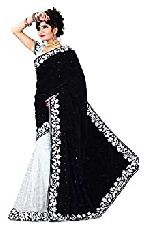

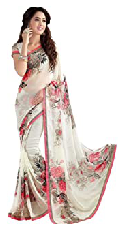

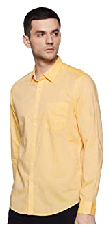

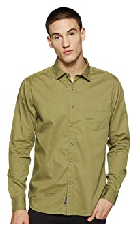

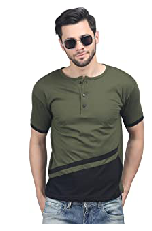

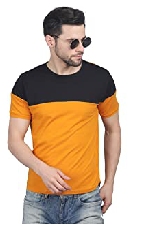

In [5]:
#lets see first two images of each  saree_dir_train, shirt_dir_train, t_shirt_dir_train dataset
import matplotlib.image as mpimg
Dir=[saree_dir_train, shirt_dir_train, t_shirt_dir_train]
for di in Dir:
    k=listdir(di)
    for i in k[:2]:
        img=mpimg.imread('{}/{}'.format(di,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

## Lets do augmentation techniques needs to be performed on all the images in  training dataset 
* Rotation Range (-30,30)
* Brightness (Increasing the brightness of the images once)
* Brightness (Decreasing the brightness of the images once)
* Flipping the images
* Sharpening

## Data Augmentation using OpenCV on the scrapped images

* In this section I perform these augmentation techniques Rotation Range (-30,30),Brightness (Increasing the brightness of the images once),Brightness (Decreasing the brightness of the images once),Flipping the images Sharpening on train dataset labels directories and save the augmented images into augmented and train labels directories.

In [6]:

for dir in Dir:
    if dir==saree_dir_aug:
        print("\nPerforming Augmentation operations on Saree images\n")
    elif dir==t_shirt_dir_aug:
        print("\nPerforming Augmentation operations on Tshirt images \n")
    elif dir==shirt_dir_aug:
        print("\nPerforming Augmentation operations on Shirt images\n")
    for i in listdir(dir):
        print("Input Image is: ",i)
        input_image=cv2.imread('{}/{}'.format(dir,i))
        input_image = cv2.resize(input_image, (150, 150), interpolation = cv2.INTER_AREA)
        print("Shape of the image is: ",input_image.shape)
        
        
        # Splitting up the filename
        fold=i.split('_')
        
        # Rotating images
        height,width=input_image.shape[:2]
        rotation_matrix=cv2.getRotationMatrix2D((width/2,height/2),30,.5)
        rotated_image=cv2.warpAffine(input_image,rotation_matrix,(width,height))
        
        # Deciding folder to save the image
        # checking first element of image name
        if fold[0]=="Shirt":
            # Save augmented Rotating images in augmented/shirts folder
            cv2.imwrite(shirt_dir_aug+'/{}_Rot.jpg'.format(i),rotated_image)
            # Save augmented Rotating images in train/shirts folder
            cv2.imwrite(shirt_dir_train+'/{}_Rot.jpg'.format(i),rotated_image)
        elif fold[0]=="Saree":
            # Save augmented Rotating images in augmented/Saree folder
            cv2.imwrite(saree_dir_aug+'/{}_Rot.jpg'.format(i),rotated_image)
            # Save augmented Rotating images in train/Saree folder
            cv2.imwrite(saree_dir_train+'/{}_Rot.jpg'.format(i),rotated_image)
        elif fold[0]=="Tshirt":
            # Save augmented Rotating images in augmented/Tshirt folder
            cv2.imwrite(t_shirt_dir_aug+'/{}_Rot.jpg'.format(i),rotated_image)
            # Save augmented Rotating images in train/Tshirt folder
            cv2.imwrite(t_shirt_dir_train+'/{}_Rot.jpg'.format(i),rotated_image)
    
        # Horizontal Flipping of the images
        flip=cv2.flip(input_image,1)
        if fold[0]=="Shirt":
            # Save augmented Horizontal Flipping images in augmented/shirt folder
            cv2.imwrite(shirt_dir_aug+'/{}_flip.jpg'.format(i),flip)
            # Save augmented rotated_image in train/shirt folder
            cv2.imwrite(shirt_dir_train+'/{}_flip.jpg'.format(i),flip)
        elif fold[0]=="Saree":
            # Save augmented Horizontal Flipping images in augmented/Saree folder
            cv2.imwrite(saree_dir_aug+'/{}_flip.jpg'.format(i),flip)
            # Save augmented Horizontal Flipping images in train/Saree folder
            cv2.imwrite(saree_dir_train+'/{}_flip.jpg'.format(i),flip)
        elif fold[0]=="Tshirt":
            # Save augmented Horizontal Flipping images in augmented/Tshirt folder
            cv2.imwrite(t_shirt_dir_aug+'/{}_flip.jpg'.format(i),flip)
            # Save augmented Horizontal Flipping images in train/Tshirt folder
            cv2.imwrite(t_shirt_dir_train+'/{}_flip.jpg'.format(i),flip)
    
        # Brightness Increase
        m=np.ones(input_image.shape,dtype="uint8")*75
        Added=cv2.add(input_image,m)
        if fold[0]=="Shirt":
            # Save augmented Brightness Increase images in augmented/shirts folder
            cv2.imwrite(shirt_dir_aug+'/{}_add.jpg'.format(i),Added)
            # Save augmented Brightness Increase images in train/shirts folder
            cv2.imwrite(shirt_dir_train+'/{}_add.jpg'.format(i),Added)
        elif fold[0]=="Saree":
            # Save augmented Brightness Increase images in augmented/Saree folder
            cv2.imwrite(saree_dir_aug+'/{}_add.jpg'.format(i),Added)
            # Save augmented Brightness Increase images in train/Saree folder
            cv2.imwrite(saree_dir_train+'/{}_add.jpg'.format(i),Added)
        elif fold[0]=="Tshirt":
            # Save augmented Brightness Increase images in augmented/Tshirt folder
            cv2.imwrite(t_shirt_dir_aug+'/{}_add.jpg'.format(i),Added)
            # Save augmented Brightness Increase images in train/Tshirt folder
            cv2.imwrite(t_shirt_dir_train+'/{}_add.jpg'.format(i),Added)
    
        # Brightness Decrease
        Subtract=cv2.subtract(input_image,m)
        if fold[0]=="Shirt":
            # Save augmented Brightness Decrease images in augmented/shirts folder
            cv2.imwrite(shirt_dir_aug+'/{}_sub.jpg'.format(i),Subtract)
            # Save augmented Brightness Decrease images in train/shirts folder
            cv2.imwrite(shirt_dir_train+'/{}_sub.jpg'.format(i),Subtract)
        elif fold[0]=="Saree":
            # Save augmented Brightness Decrease images in augmented/Saree folder
            cv2.imwrite(saree_dir_aug+'/{}_sub.jpg'.format(i),Subtract)
            # Save augmented Brightness Decrease images in train/Saree folder
            cv2.imwrite(saree_dir_train+'/{}_sub.jpg'.format(i),Subtract)
        elif fold[0]=="Tshirt":
            # Save augmented Brightness Decrease images in augmented/Tshirt folder
            cv2.imwrite(t_shirt_dir_aug+'/{}_sub.jpg'.format(i),Subtract)
            # Save augmented Brightness Decrease images in train/Tshirt folder
            cv2.imwrite(t_shirt_dir_train+'/{}_sub.jpg'.format(i),Subtract)

        # Sharpening Images
        kernel_sharpening=np.array([[-1,-1,-1],
                                    [-1,10,-1],
                                    [-1,-1,-1]])
        sharpened=cv2.filter2D(input_image,-1,kernel_sharpening)
        if fold[0]=="Shirt":
            # Save augmented Sharpening images in augmented/Tshirt folder
            cv2.imwrite(shirt_dir_aug+'/{}_sharp.jpg'.format(i),sharpened)
            # Save augmented Sharpening images in train/Tshirt folder
            cv2.imwrite(shirt_dir_train+'/{}_sharp.jpg'.format(i),sharpened)
        elif fold[0]=="Saree":
            # Save augmented Sharpening images in augmented/Tshirt folder
            cv2.imwrite(saree_dir_aug+'/{}_sharp.jpg'.format(i),sharpened)
            # Save augmented Sharpening images in train/Tshirt folder
            cv2.imwrite(saree_dir_train+'/{}_sharp.jpg'.format(i),sharpened)
        elif fold[0]=="Tshirt":
            # Save augmented Sharpening images in augmented/Tshirt folder
            cv2.imwrite(t_shirt_dir_aug+'/{}_sharp.jpg'.format(i),sharpened)
            # Save augmented Sharpening images in train/Tshirt folder
            cv2.imwrite(t_shirt_dir_train+'/{}_sharp.jpg'.format(i),sharpened)    

Input Image is:  Saree_img_10.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_11.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_110.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_111.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_112.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_113.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_114.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_115.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_116.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_117.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_118.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_119.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_12.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_120.jpeg
Shape

Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_150.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_152.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_155.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_156.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_157.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_159.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_16.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_17.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_18.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_19.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_20.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_21.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_210.jpeg
Shape of the image is:  (150, 150, 3)
Input 

Shape of the image is:  (150, 150, 3)
Input Image is:  Tshirt_img_37.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Tshirt_img_39.jpeg
Shape of the image is:  (150, 150, 3)


### Let's check how many images there are in test , train and augmented directory


In [7]:
print("no of images of saree in augmented dataset ",len(os.listdir(saree_dir_aug)))
print("no of images of shirts in augmented dataset ",len(os.listdir(shirt_dir_aug)))
print("no of images of t-shirts in augmented dataset ",len(os.listdir(t_shirt_dir_aug)))

print("no of images of saree in train dataset ",len(os.listdir(saree_dir_train)))
print("no of images of shirts in train dataset ",len(os.listdir(shirt_dir_train)))
print("no of images of t-shirts in train dataset ",len(os.listdir(t_shirt_dir_train)))

print("no of images of saree in test dataset ",len(os.listdir(saree_dir_test)))
print("no of images of shirts in test dataset ",len(os.listdir(shirt_dir_test)))
print("no of images of t-shirts in test dataset ",len(os.listdir(t_shirt_dir_test)))



no of images of saree in augmented dataset  400
no of images of shirts in augmented dataset  400
no of images of t-shirts in augmented dataset  400
no of images of saree in train dataset  480
no of images of shirts in train dataset  480
no of images of t-shirts in train dataset  480
no of images of saree in test dataset  20
no of images of shirts in test dataset  20
no of images of t-shirts in test dataset  20


### checking image after applying data augmentation technique


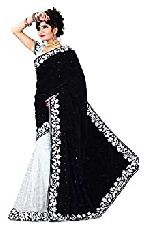

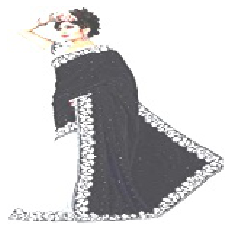

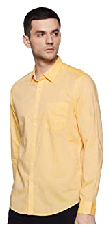

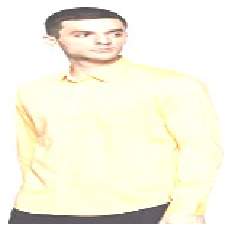

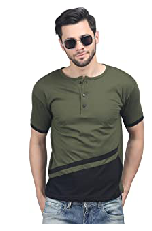

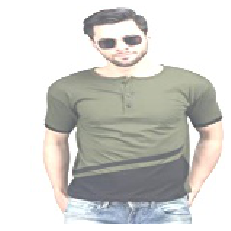

In [8]:
import matplotlib.image as mpimg

for di in Dir:
    k=listdir(di)
    for i in k[:2]:
        img=mpimg.imread('{}/{}'.format(di,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

### Let's define the variables

In [9]:
input_shape=(150,150,3)
img_width=150
img_height=150
batch_size=16
epoch=20

train_data_dir='./ama-clothes/train'
validation_data_dir='./ama-clothes/test'

nb_train_samples=480
nb_validation_samples=20

## Data Preprocessing


In [10]:
# Validation
Data_gen=ImageDataGenerator(rescale=1./255)
validation_generator=Data_gen.flow_from_directory(validation_data_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size, 
                                                  class_mode='categorical',
                                                 shuffle=False)

# Training

train_generator=Data_gen.flow_from_directory(train_data_dir,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size, 
                                                              class_mode='categorical')



Found 60 images belonging to 3 classes.
Found 1440 images belonging to 3 classes.


In [11]:
# checking class indices for validation_generator
validation_generator.class_indices


{'Saree': 0, 'Tshirts': 1, 'shirts': 2}

In [12]:
# checking class indices for train_generator
train_generator.class_indices

{'Saree': 0, 'Tshirts': 1, 'shirts': 2}

##  Define and train our model at different learning rates(using SGD + Momentum optimizer)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.1559 - accuracy: 0.3354
Epoch 00001: val_loss improved from inf to 0.89053, saving model to ./sgd0.h5
30/30 [==============================] - 9s 305ms/step - loss: 1.1559 - accuracy: 0.3354 - val_loss: 0.8905 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.1492 - accuracy: 0.3271
Epoch 00002: val_loss did not improve from 0.89053
30/30 [==============================] - 9s 306ms/step - loss: 1.1492 - accuracy: 0.3271 - val_loss: 1.0107 - val_accuracy: 0.0000e+00 - lr: 0.1000
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.1196 - accuracy: 0.3125
Epoch 00003: val_loss did not improve from 0.89053
30/30 [==============================] - 10s 320ms/step - loss: 1.1196 - accuracy: 0.3125 - val_loss: 1.0067 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 4/20
30/30 [=======

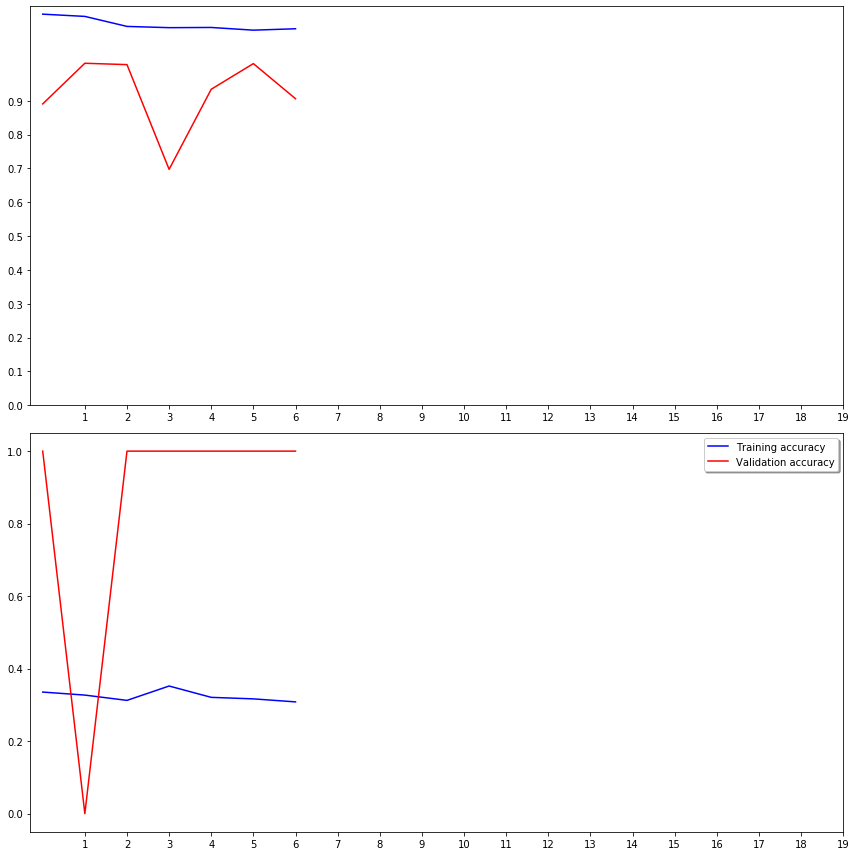

4/4 [==============================] - 0s 52ms/step - loss: 1.1558 - accuracy: 0.3333
***********************************************************************************************
Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.1369 - accuracy: 0.3854
Epoch 00001: val_loss improved from inf to 1.05590, saving model to ./sgd1.h5
30/30 [==============================] - 10s 317ms/step - loss: 1.1369 - accuracy: 0.3854 - val_loss: 1.0559 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.0822 - accuracy: 0.3979
Epoch 00002: val_loss did not improve from 1.05590
30/30 [==============================] - 9s 313ms/step - loss: 1.0822 - accuracy: 0.3979 - val_loss: 1.1970 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.0985 - accuracy: 0.4062
Epoch 00003: val_loss did not improve from 1.05590
30/30 [==============================] - 9s 309ms/step - loss: 

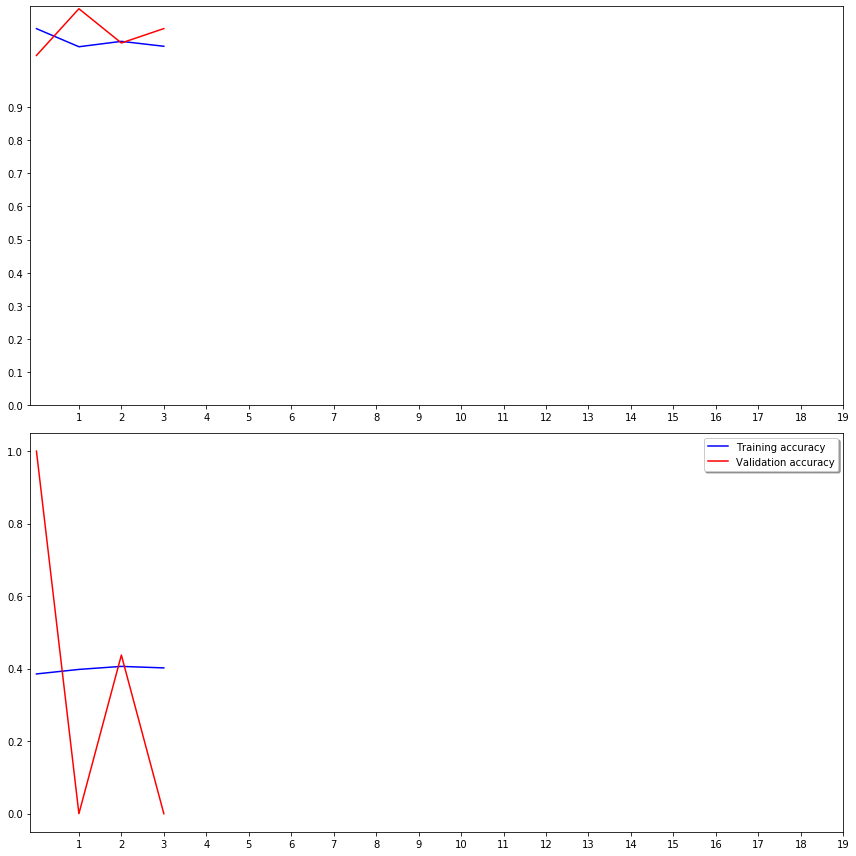

4/4 [==============================] - 0s 47ms/step - loss: 1.0909 - accuracy: 0.3833
***********************************************************************************************
Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.1170 - accuracy: 0.3938
Epoch 00001: val_loss improved from inf to 1.05665, saving model to ./sgd2.h5
30/30 [==============================] - 9s 314ms/step - loss: 1.1170 - accuracy: 0.3938 - val_loss: 1.0566 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.0856 - accuracy: 0.4292
Epoch 00002: val_loss improved from 1.05665 to 1.04356, saving model to ./sgd2.h5
30/30 [==============================] - 9s 303ms/step - loss: 1.0856 - accuracy: 0.4292 - val_loss: 1.0436 - val_accuracy: 0.6250 - lr: 0.0100
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.0141 - accuracy: 0.5167
Epoch 00003: val_loss improved from 1.04356 to 0.78105, saving model to ./sgd2.h5
30/30 

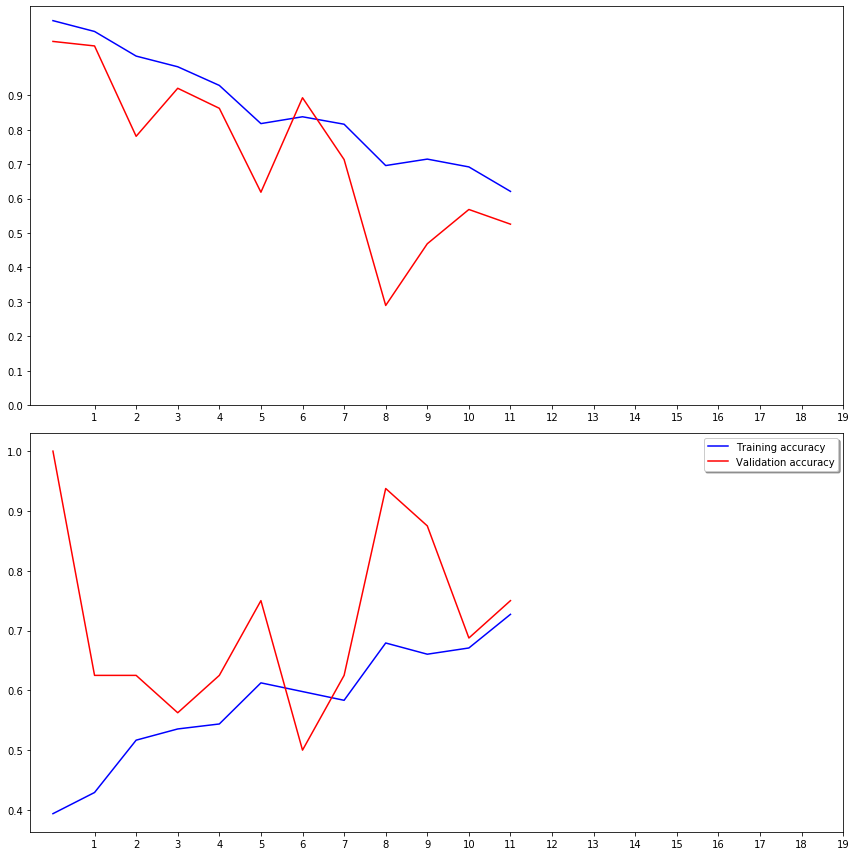

4/4 [==============================] - 0s 90ms/step - loss: 0.5984 - accuracy: 0.7833
***********************************************************************************************


In [14]:
# Let's create a list which contains different learning rate
lr=[0.1,0.001,0.01]
evaluate=[]

for i,a in enumerate(lr):
    model=Sequential()

    # First convolution layer
    model.add(Conv2D(32,(3,3),input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Second convolution layer
    model.add(Conv2D(32,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Third convolution layer
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Fourth convolution layer
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.SGD(learning_rate=a,momentum=0.9),metrics=['accuracy'])

    ## EarlyStopping and ModelCheckpoint

    checkpoint = ModelCheckpoint("./sgd{0}.h5".format(i),
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

    earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

    reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)
        # we put our call backs into a callback list
    callbacks = [earlystop, checkpoint, reduce_lr]

  
        #Traing 
    history = model.fit_generator(
             train_generator, 
             epochs=epoch,
             validation_data=validation_generator,
             validation_steps=nb_validation_samples//batch_size,
             steps_per_epoch=nb_train_samples//batch_size,
             callbacks=callbacks
  
        )
    #Virtualize Training
    import matplotlib.pyplot as plt
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
    ax1.plot(history.history['loss'], color='b', label="Training loss")
    ax1.plot(history.history['val_loss'], color='r', label="validation loss")
    ax1.set_xticks(np.arange(1, epoch, 1))
    ax1.set_yticks(np.arange(0, 1, 0.1))

    ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
    ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
    ax2.set_xticks(np.arange(1, epoch, 1))

    legend = plt.legend(loc='best', shadow=True)
    plt.tight_layout()
    plt.show()

        #lets evaluate our model
    r=model.evaluate(validation_generator)
    evaluate.append(r)
    print("***********************************************************************************************")


In [15]:
#lets check accuracy and loss for different learning rate
df=pd.DataFrame({"Loss & Accuracy":evaluate,"learning rate":lr})
df

,Loss & Accuracy,learning rate
0,"[1.155753493309021, 0.3333333432674408]",0.100
1,"[1.0909289121627808, 0.38333332538604736]",0.001
2,"[0.5984408855438232, 0.7833333611488342]",0.010


### Model performs well using SGD optimiser at learning rate(0.01 )

### Load the model and Display the confusion matrix and classification report

In [16]:
#Load the model
saved_model_sgd=load_model("sgd2.h5")
#Display the confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}


Y_pred = saved_model_sgd.predict(validation_generator, nb_validation_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[19  1  0]
 [ 1  9 10]
 [ 1  0 19]]
Classification Report
              precision    recall  f1-score   support

       Saree       0.90      0.95      0.93        20
     Tshirts       0.90      0.45      0.60        20
      shirts       0.66      0.95      0.78        20

    accuracy                           0.78        60
   macro avg       0.82      0.78      0.77        60
weighted avg       0.82      0.78      0.77        60



### Testing our  classifier using SGD optimiser

In [17]:
pred = saved_model_sgd.predict(validation_generator)

y_classes = pred.argmax(axis=-1)
print(y_classes)
res = pd.DataFrame()
res['ImageId'] = list(range(1,61))
res['Predicted_Label'] = y_classes
res['Actual_Label']=validation_generator.classes
res["Predicted_Label"] = res["Predicted_Label"].replace({0: 'Saree', 1: 'Shirt',2:'Tshirt'})
res["Actual_Label"] = res["Actual_Label"].replace({0: 'Saree', 1: 'Shirt',2:'Tshirt'})
res.head(40)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 2 1 1 1 1 1 2 1 2 2 2 1 1 2 2 0
 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2]


,ImageId,Predicted_Label,Actual_Label
0,1,Saree,Saree
1,2,Saree,Saree
2,3,Saree,Saree
3,4,Saree,Saree
4,5,Saree,Saree
5,6,Saree,Saree
6,7,Saree,Saree
7,8,Saree,Saree
8,9,Saree,Saree
9,10,Saree,Saree


### Let's predict the test images using openCV for SGD optimiser

In [18]:
from keras.preprocessing import image
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 500 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (150, 150) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (150, 150) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 150, 150


files = []
predictions = []
true_labels = []
# predicting images
for i in range(0, 10):
    path = './ama-clothes/test/'
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = saved_model_sgd.predict_classes(images, batch_size = 8)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


##  Define and train our model at different learning rates (using SGD + Momentum+Nesterov Accelerated Gradient Descent optimiser)


Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.2357 - accuracy: 0.3667
Epoch 00001: val_loss improved from inf to 1.12384, saving model to ./sgdn0.h5
30/30 [==============================] - 15s 508ms/step - loss: 1.2357 - accuracy: 0.3667 - val_loss: 1.1238 - val_accuracy: 0.0000e+00 - lr: 0.1000
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.1208 - accuracy: 0.3292
Epoch 00002: val_loss improved from 1.12384 to 1.01481, saving model to ./sgdn0.h5
30/30 [==============================] - 15s 494ms/step - loss: 1.1208 - accuracy: 0.3292 - val_loss: 1.0148 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.1135 - accuracy: 0.3562
Epoch 00003: val_loss did not improve from 1.01481
30/30 [==============================] - 15s 496ms/step - loss: 1.1135 - accuracy: 0.3562 - val_loss: 1.2922 - val_accuracy: 0.0000e+00 - lr: 0.1000
Epoch 4/20
30/30 [==============================] - ETA: 0s - 

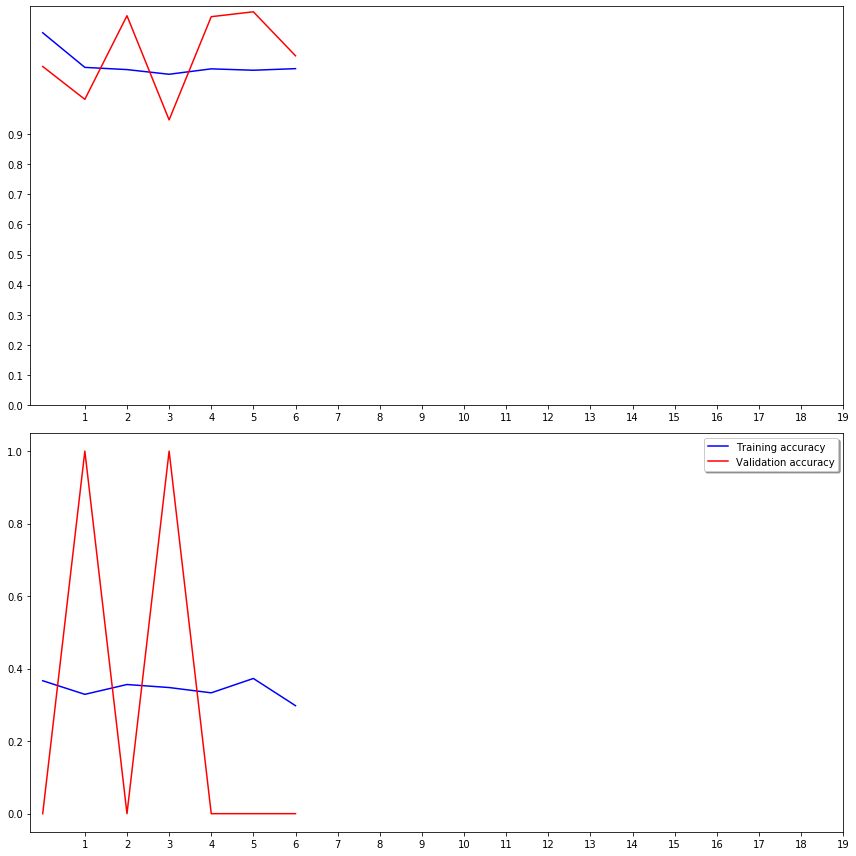

4/4 [==============================] - 0s 91ms/step - loss: 1.1163 - accuracy: 0.3333
***********************************************************************************************
Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.1441 - accuracy: 0.3333
Epoch 00001: val_loss improved from inf to 1.11681, saving model to ./sgdn1.h5
30/30 [==============================] - 16s 536ms/step - loss: 1.1441 - accuracy: 0.3333 - val_loss: 1.1168 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.1105 - accuracy: 0.3625
Epoch 00002: val_loss improved from 1.11681 to 1.10780, saving model to ./sgdn1.h5
30/30 [==============================] - 15s 494ms/step - loss: 1.1105 - accuracy: 0.3625 - val_loss: 1.1078 - val_accuracy: 0.0625 - lr: 0.0010
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.0775 - accuracy: 0.4292
Epoch 00003: val_loss improved from 1.10780 to 1.10357, saving model to ./sgdn1.

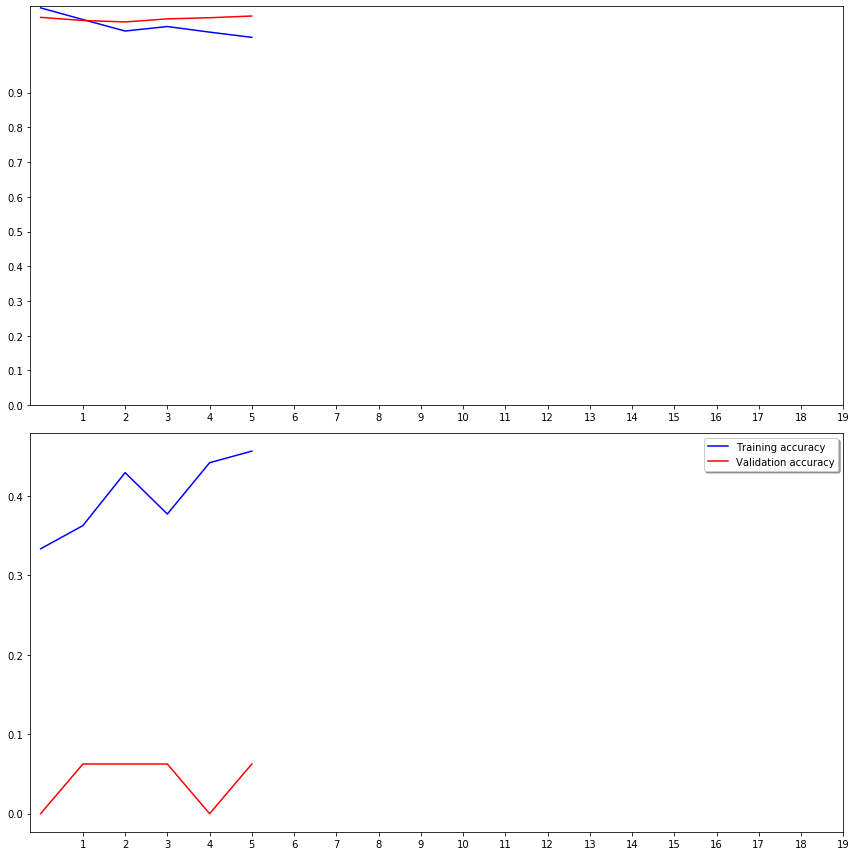

4/4 [==============================] - 0s 79ms/step - loss: 1.0925 - accuracy: 0.3333
***********************************************************************************************
Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.1038 - accuracy: 0.3479
Epoch 00001: val_loss improved from inf to 1.15427, saving model to ./sgdn2.h5
30/30 [==============================] - 9s 305ms/step - loss: 1.1038 - accuracy: 0.3479 - val_loss: 1.1543 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.0509 - accuracy: 0.4563
Epoch 00002: val_loss improved from 1.15427 to 1.07200, saving model to ./sgdn2.h5
30/30 [==============================] - 9s 302ms/step - loss: 1.0509 - accuracy: 0.4563 - val_loss: 1.0720 - val_accuracy: 0.4375 - lr: 0.0100
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 0.9791 - accuracy: 0.5104
Epoch 00003: val_loss improved from 1.07200 to 0.55931, saving model to ./sgdn2.h5

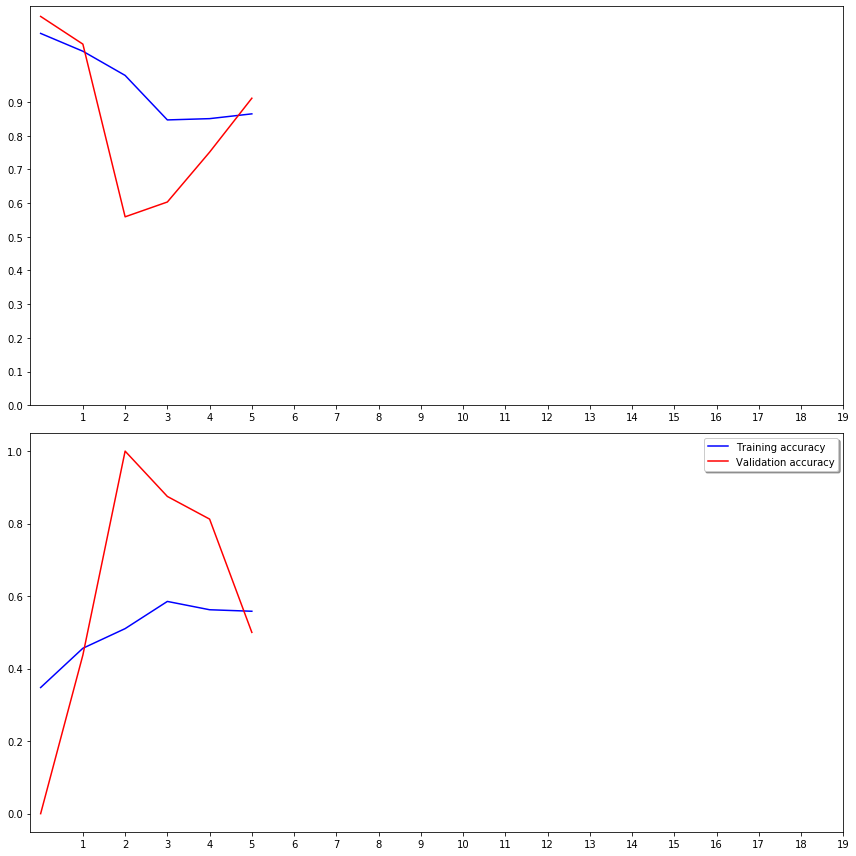

4/4 [==============================] - 0s 47ms/step - loss: 0.8931 - accuracy: 0.6500
***********************************************************************************************


In [19]:
evaluate1=[]
for i,a in enumerate(lr):
    
    model=Sequential()

    # First convolution layer
    model.add(Conv2D(32,(3,3),input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Second convolution layer
    model.add(Conv2D(32,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Third convolution layer
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Fourth convolution layer
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.SGD(learning_rate=a,momentum=0.9,nesterov=True),metrics=['accuracy'])

    checkpoint = ModelCheckpoint("./sgdn{0}.h5".format(i),
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

    earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

    reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)
        # we put our call backs into a callback list
        
    callbacks = [earlystop, checkpoint, reduce_lr]

  
        #Traing 
    history = model.fit_generator(
             train_generator, 
             epochs=epoch,
             validation_data=validation_generator,
             validation_steps=nb_validation_samples//batch_size,
             steps_per_epoch=nb_train_samples//batch_size,
             callbacks=callbacks
  
        )
    #Virtualize Training
    import matplotlib.pyplot as plt
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
    ax1.plot(history.history['loss'], color='b', label="Training loss")
    ax1.plot(history.history['val_loss'], color='r', label="validation loss")
    ax1.set_xticks(np.arange(1, epoch, 1))
    ax1.set_yticks(np.arange(0, 1, 0.1))

    ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
    ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
    ax2.set_xticks(np.arange(1, epoch, 1))

    legend = plt.legend(loc='best', shadow=True)
    plt.tight_layout()
    plt.show()

        #lets evaluate our model
    r1=model.evaluate(validation_generator)
    evaluate1.append(r1)
    print("***********************************************************************************************")





In [20]:
#lets check accuracy and loss for different learning rate
df=pd.DataFrame({"Loss & Accuracy":evaluate1,"learning rate":lr})
df

,Loss & Accuracy,learning rate
0,"[1.1163408756256104, 0.3333333432674408]",0.100
1,"[1.0925108194351196, 0.3333333432674408]",0.001
2,"[0.8930643796920776, 0.6499999761581421]",0.010


### Model performs well  at learning rate(0.01 )

### Load the model and Display the confusion matrix and classification report

In [21]:
#Load the model
saved_model_nag=load_model("sgdn2.h5")

#Display the confusion matrix and classification report

from sklearn.metrics import classification_report, confusion_matrix
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}


Y_pred = saved_model_nag.predict(validation_generator, nb_validation_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[20  0  0]
 [ 3 12  5]
 [10  3  7]]
Classification Report
              precision    recall  f1-score   support

       Saree       0.61      1.00      0.75        20
     Tshirts       0.80      0.60      0.69        20
      shirts       0.58      0.35      0.44        20

    accuracy                           0.65        60
   macro avg       0.66      0.65      0.63        60
weighted avg       0.66      0.65      0.63        60



### Testing our  classifier using nag

In [22]:
pred = saved_model_nag.predict(validation_generator)

y_classes = pred.argmax(axis=-1)
print(y_classes)
res = pd.DataFrame()
res['ImageId'] = list(range(1,61))
res['Predicted_Label'] = y_classes
res['Actual_Label']=validation_generator.classes
res["Predicted_Label"] = res["Predicted_Label"].replace({0: 'Saree', 1: 'Shirt',2:'Tshirt'})
res["Actual_Label"] = res["Actual_Label"].replace({0: 'Saree', 1: 'Shirt',2:'Tshirt'})
res.head(40)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 2 1 1 0 1 2 1 1 1 1 2 1
 2 2 0 2 0 0 0 2 0 2 0 0 2 1 0 2 2 0 0 1 0 2 1]


,ImageId,Predicted_Label,Actual_Label
0,1,Saree,Saree
1,2,Saree,Saree
2,3,Saree,Saree
3,4,Saree,Saree
4,5,Saree,Saree
5,6,Saree,Saree
6,7,Saree,Saree
7,8,Saree,Saree
8,9,Saree,Saree
9,10,Saree,Saree


### Let's predict the test images using openCV for NAG

In [23]:
from keras.preprocessing import image
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 500 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (150, 150) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (150, 150) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 150, 150


files = []
predictions = []
true_labels = []
# predicting images
for i in range(0, 10):
    path = './ama-clothes/test/'
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = saved_model_nag.predict_classes(images, batch_size = 8)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

##  Define and train our model at different learning rates (using rmsprop optimiser)


In [24]:
evaluate2=[]
for i,a in enumerate(lr):
    model=Sequential()

    # First convolution layer
    model.add(Conv2D(32,(3,3),input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Second convolution layer
    model.add(Conv2D(32,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Third convolution layer
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Fourth convolution layer
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',optimizer = RMSprop(lr = a,  rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False),metrics=['accuracy'])

    ## EarlyStopping and ModelCheckpoint

    checkpoint = ModelCheckpoint("./rmsprop{0}.h5".format(i),
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

    earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

    reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)
        # we put our call backs into a callback list
    callbacks = [earlystop, checkpoint, reduce_lr]

  
        #Traing 
    history = model.fit_generator(
             train_generator, 
             epochs=epoch,
             validation_data=validation_generator,
             validation_steps=nb_validation_samples//batch_size,
             steps_per_epoch=nb_train_samples//batch_size,
             callbacks=callbacks
  
        )

        #lets evaluate our model
    r2=model.evaluate(validation_generator)
    evaluate2.append(r2)
    print("***********************************************************************************************")




Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 22114944.0000 - accuracy: 0.3625
Epoch 00001: val_loss improved from inf to 1.22052, saving model to ./rmsprop0.h5
30/30 [==============================] - 15s 515ms/step - loss: 22114944.0000 - accuracy: 0.3625 - val_loss: 1.2205 - val_accuracy: 0.0000e+00 - lr: 0.1000
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.3254 - accuracy: 0.3167
Epoch 00002: val_loss did not improve from 1.22052
30/30 [==============================] - 15s 502ms/step - loss: 1.3254 - accuracy: 0.3167 - val_loss: 3.8563 - val_accuracy: 0.0000e+00 - lr: 0.1000
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.1751 - accuracy: 0.3583
Epoch 00003: val_loss improved from 1.22052 to 0.78292, saving model to ./rmsprop0.h5
30/30 [==============================] - 13s 419ms/step - loss: 1.1751 - accuracy: 0.3583 - val_loss: 0.7829 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 4/20
30/30 [========================

Epoch 19/20
30/30 [==============================] - ETA: 0s - loss: 0.2620 - accuracy: 0.8938Restoring model weights from the end of the best epoch.

Epoch 00019: val_loss did not improve from 0.01212

Epoch 00019: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
30/30 [==============================] - 9s 301ms/step - loss: 0.2620 - accuracy: 0.8938 - val_loss: 0.0247 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 00019: early stopping
4/4 [==============================] - 0s 47ms/step - loss: 0.3666 - accuracy: 0.8167
***********************************************************************************************
Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 23.0581 - accuracy: 0.3354
Epoch 00001: val_loss improved from inf to 1.04662, saving model to ./rmsprop2.h5
30/30 [==============================] - 9s 306ms/step - loss: 23.0581 - accuracy: 0.3354 - val_loss: 1.0466 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 2/20
30/30 [======================

In [25]:
#lets check accuracy and loss for different learning rate
df=pd.DataFrame({"Loss & Accuracy":evaluate2,"learning rate":lr})
df

,Loss & Accuracy,learning rate
0,"[1.151928186416626, 0.3333333432674408]",0.100
1,"[0.36659830808639526, 0.8166666626930237]",0.001
2,"[1.0996631383895874, 0.3333333432674408]",0.010


### Model performs well using rmsprop optimiser at learning rate(0.001 )

### Load the model and Display the confusion matrix and classification report

In [26]:
#Let's load a model
saved_model_rmsprop=load_model("rmsprop1.h5")

#Display the confusion matrix and classification report

from sklearn.metrics import classification_report, confusion_matrix
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}


Y_pred = saved_model_rmsprop.predict(validation_generator, nb_validation_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[20  0  0]
 [ 4 10  6]
 [ 0  1 19]]
Classification Report
              precision    recall  f1-score   support

       Saree       0.83      1.00      0.91        20
     Tshirts       0.91      0.50      0.65        20
      shirts       0.76      0.95      0.84        20

    accuracy                           0.82        60
   macro avg       0.83      0.82      0.80        60
weighted avg       0.83      0.82      0.80        60



### Testing our  classifier using rmsprop optimiser

In [27]:
pred = saved_model_rmsprop.predict(validation_generator)

y_classes = pred.argmax(axis=-1)
print(y_classes)
res = pd.DataFrame()
res['ImageId'] = list(range(1,61))
res['Predicted_Label'] = y_classes
res['Actual_Label']=validation_generator.classes
res["Predicted_Label"] = res["Predicted_Label"].replace({0: 'Saree', 1: 'Shirt',2:'Tshirt'})
res["Actual_Label"] = res["Actual_Label"].replace({0: 'Saree', 1: 'Shirt',2:'Tshirt'})
#res.to_csv('final_OpenCV_Data_Aug.csv', index=False)
res.head(40)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 0 2 0 2 0 1 2 1 1 1 1 1 0
 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2]


,ImageId,Predicted_Label,Actual_Label
0,1,Saree,Saree
1,2,Saree,Saree
2,3,Saree,Saree
3,4,Saree,Saree
4,5,Saree,Saree
5,6,Saree,Saree
6,7,Saree,Saree
7,8,Saree,Saree
8,9,Saree,Saree
9,10,Saree,Saree


### Let's predict the test images using openCV for rmsprop optimiser

In [28]:
from keras.preprocessing import image
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 500 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (150, 150) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (150, 150) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 150, 150


files = []
predictions = []
true_labels = []
# predicting images
for i in range(0, 10):
    path = './ama-clothes/test/'
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = saved_model_rmsprop.predict_classes(images, batch_size = 8)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

##  Define and train our model at different learning rates (using Adam optimiser)


Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 31673.9473 - accuracy: 0.3375
Epoch 00001: val_loss improved from inf to 0.93116, saving model to ./adam0.h5
30/30 [==============================] - 9s 313ms/step - loss: 31673.9473 - accuracy: 0.3375 - val_loss: 0.9312 - val_accuracy: 0.0000e+00 - lr: 0.1000
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.1328 - accuracy: 0.3500
Epoch 00002: val_loss did not improve from 0.93116
30/30 [==============================] - 10s 318ms/step - loss: 1.1328 - accuracy: 0.3500 - val_loss: 1.2329 - val_accuracy: 0.0000e+00 - lr: 0.1000
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.1129 - accuracy: 0.3229
Epoch 00003: val_loss did not improve from 0.93116
30/30 [==============================] - 10s 325ms/step - loss: 1.1129 - accuracy: 0.3229 - val_loss: 1.0195 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 4/20
30/30 [==============================] - ETA: 0s - loss: 1.1028 - accuracy: 

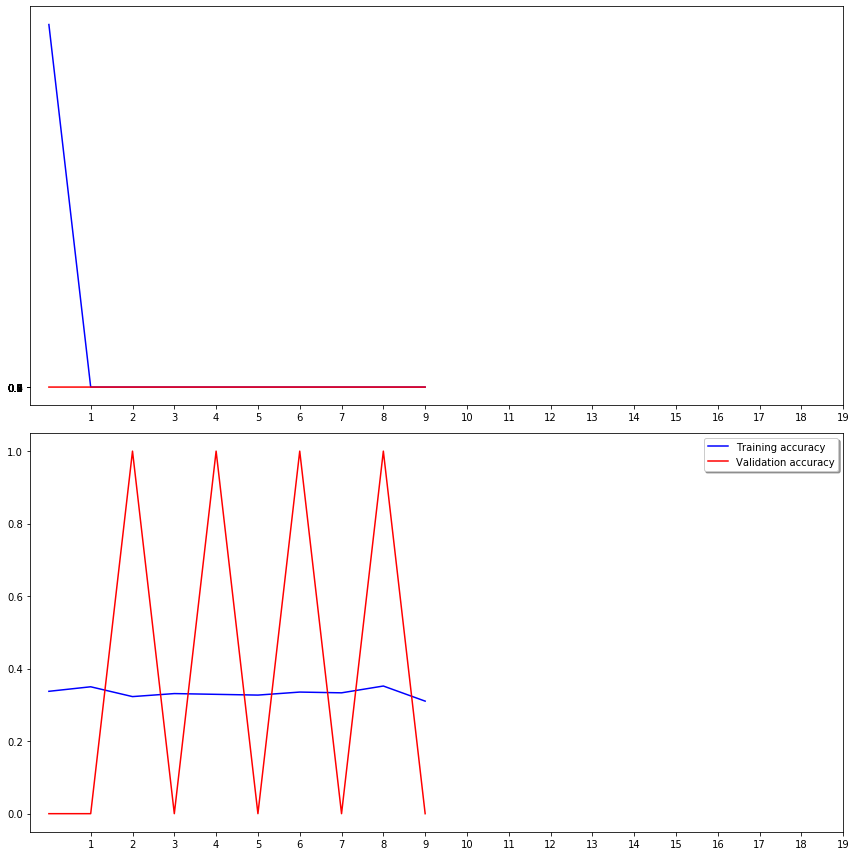

4/4 [==============================] - 0s 55ms/step - loss: 1.1101 - accuracy: 0.3333
***********************************************************************************************
Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.1716 - accuracy: 0.3333
Epoch 00001: val_loss improved from inf to 1.10648, saving model to ./adam1.h5
30/30 [==============================] - 10s 320ms/step - loss: 1.1716 - accuracy: 0.3333 - val_loss: 1.1065 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.0598 - accuracy: 0.4313
Epoch 00002: val_loss improved from 1.10648 to 0.61069, saving model to ./adam1.h5
30/30 [==============================] - 11s 380ms/step - loss: 1.0598 - accuracy: 0.4313 - val_loss: 0.6107 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 0.9071 - accuracy: 0.5604
Epoch 00003: val_loss improved from 0.61069 to 0.59689, saving model to ./adam1.

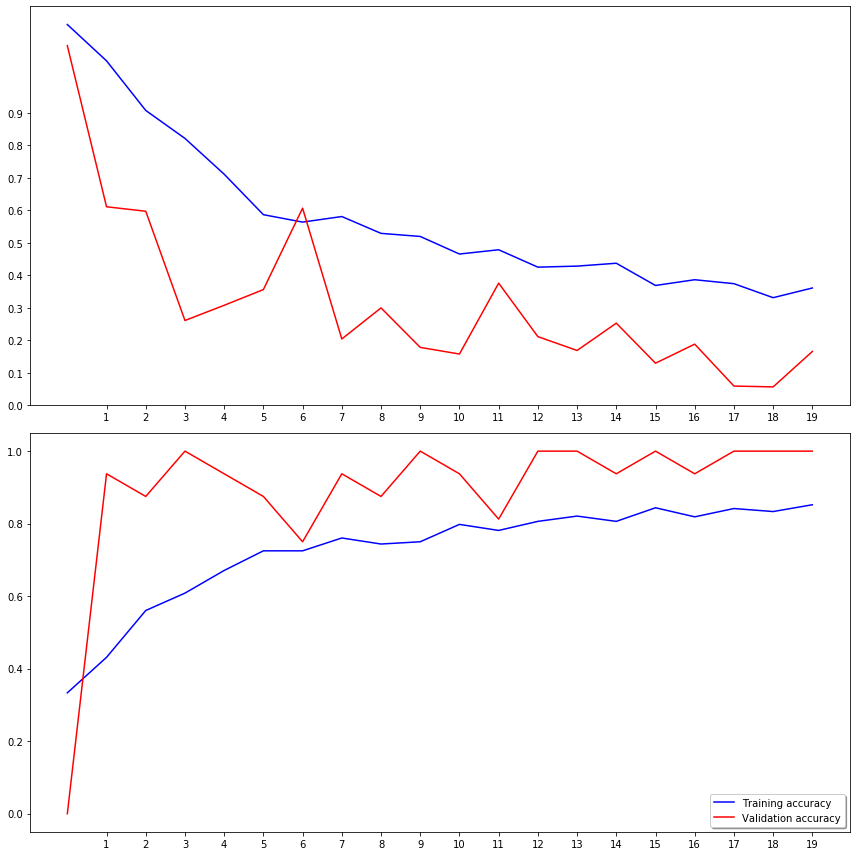

4/4 [==============================] - 0s 92ms/step - loss: 0.3904 - accuracy: 0.8500
***********************************************************************************************
Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 6.6914 - accuracy: 0.3354
Epoch 00001: val_loss improved from inf to 1.09452, saving model to ./adam2.h5
30/30 [==============================] - 16s 522ms/step - loss: 6.6914 - accuracy: 0.3354 - val_loss: 1.0945 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.0987 - accuracy: 0.3250
Epoch 00002: val_loss improved from 1.09452 to 0.98639, saving model to ./adam2.h5
30/30 [==============================] - 15s 511ms/step - loss: 1.0987 - accuracy: 0.3250 - val_loss: 0.9864 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.1063 - accuracy: 0.3104
Epoch 00003: val_loss did not improve from 0.98639
30/30 [======================

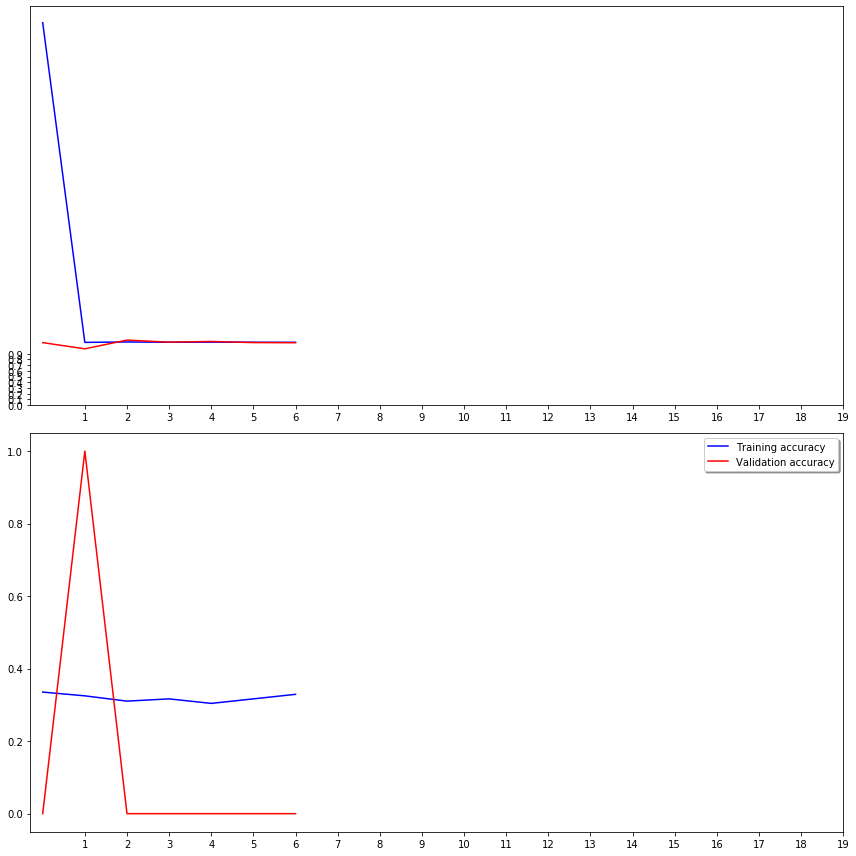

4/4 [==============================] - 0s 80ms/step - loss: 1.1036 - accuracy: 0.3333
***********************************************************************************************


In [29]:
evaluate3=[]
for i,a in enumerate(lr):
    model=Sequential()

    # First convolution layer
    model.add(Conv2D(32,(3,3),input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Second convolution layer
    model.add(Conv2D(32,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Third convolution layer
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Fourth convolution layer
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=a,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=True),metrics=['accuracy'])

    checkpoint = ModelCheckpoint("./adam{0}.h5".format(i),
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

    earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

    reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)
        # we put our call backs into a callback list
    callbacks = [earlystop, checkpoint, reduce_lr]

  
        #Traing 
    history = model.fit_generator(
             train_generator, 
             epochs=epoch,
             validation_data=validation_generator,
             validation_steps=nb_validation_samples//batch_size,
             steps_per_epoch=nb_train_samples//batch_size,
             callbacks=callbacks
  
        )
    #Virtualize Training
    import matplotlib.pyplot as plt
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
    ax1.plot(history.history['loss'], color='b', label="Training loss")
    ax1.plot(history.history['val_loss'], color='r', label="validation loss")
    ax1.set_xticks(np.arange(1, epoch, 1))
    ax1.set_yticks(np.arange(0, 1, 0.1))

    ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
    ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
    ax2.set_xticks(np.arange(1, epoch, 1))

    legend = plt.legend(loc='best', shadow=True)
    plt.tight_layout()
    plt.show()

        #lets evaluate our model
    r3=model.evaluate(validation_generator)
    evaluate3.append(r3)
    print("***********************************************************************************************")

In [30]:
#lets check accuracy and loss for different learning rate
df=pd.DataFrame({"Loss & Accuracy":evaluate3,"learning rate":lr})
df

,Loss & Accuracy,learning rate
0,"[1.1100929975509644, 0.3333333432674408]",0.100
1,"[0.39035168290138245, 0.8500000238418579]",0.001
2,"[1.1036186218261719, 0.3333333432674408]",0.010


### Model performs well using Adam optimiser at learning rate(0.001 )

### Load the model and Display the confusion matrix and classification report

In [31]:
#Let's load a model
saved_model_adam=load_model("adam1.h5")

#Display the confusion matrix and classification report

from sklearn.metrics import classification_report, confusion_matrix
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}


Y_pred = saved_model_adam.predict(validation_generator, nb_validation_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


Confusion Matrix
[[20  0  0]
 [ 1 11  8]
 [ 0  1 19]]
Classification Report
              precision    recall  f1-score   support

       Saree       0.95      1.00      0.98        20
     Tshirts       0.92      0.55      0.69        20
      shirts       0.70      0.95      0.81        20

    accuracy                           0.83        60
   macro avg       0.86      0.83      0.82        60
weighted avg       0.86      0.83      0.82        60



### Testing our  classifier using Adam optimiser

In [32]:
pred = saved_model_adam.predict(validation_generator)

y_classes = pred.argmax(axis=-1)
print(y_classes)
res = pd.DataFrame()
res['ImageId'] = list(range(1,61))
res['Predicted_Label'] = y_classes
res['Actual_Label']=validation_generator.classes
res["Predicted_Label"] = res["Predicted_Label"].replace({0: 'Saree', 1: 'Shirt',2:'Tshirt'})
res["Actual_Label"] = res["Actual_Label"].replace({0: 'Saree', 1: 'Shirt',2:'Tshirt'})
res.head(40)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 2 1 2 2 2 1 1 2 1 0
 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2]


,ImageId,Predicted_Label,Actual_Label
0,1,Saree,Saree
1,2,Saree,Saree
2,3,Saree,Saree
3,4,Saree,Saree
4,5,Saree,Saree
5,6,Saree,Saree
6,7,Saree,Saree
7,8,Saree,Saree
8,9,Saree,Saree
9,10,Saree,Saree


### Let's predict the test images using openCV for Adam optimiser

In [33]:
from keras.preprocessing import image
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 500 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (150, 150) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (150, 150) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 150, 150


files = []
predictions = []
true_labels = []
# predicting images
for i in range(0, 10):
    path = './ama-clothes/test/'
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = saved_model_adam.predict_classes(images, batch_size = 8)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

##  Define and train our model at different learning rates (using Nadam optimiser)


Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 977.6504 - accuracy: 0.4042 
Epoch 00001: val_loss improved from inf to 1.02668, saving model to ./nadam0.h5
30/30 [==============================] - 10s 322ms/step - loss: 977.6504 - accuracy: 0.4042 - val_loss: 1.0267 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.1400 - accuracy: 0.3187
Epoch 00002: val_loss did not improve from 1.02668
30/30 [==============================] - 10s 322ms/step - loss: 1.1400 - accuracy: 0.3187 - val_loss: 1.3000 - val_accuracy: 0.0000e+00 - lr: 0.1000
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.1175 - accuracy: 0.3167
Epoch 00003: val_loss did not improve from 1.02668
30/30 [==============================] - 9s 308ms/step - loss: 1.1175 - accuracy: 0.3167 - val_loss: 1.1204 - val_accuracy: 0.0000e+00 - lr: 0.1000
Epoch 4/20
30/30 [==============================] - ETA: 0s - loss: 1.1054 - accuracy: 0.

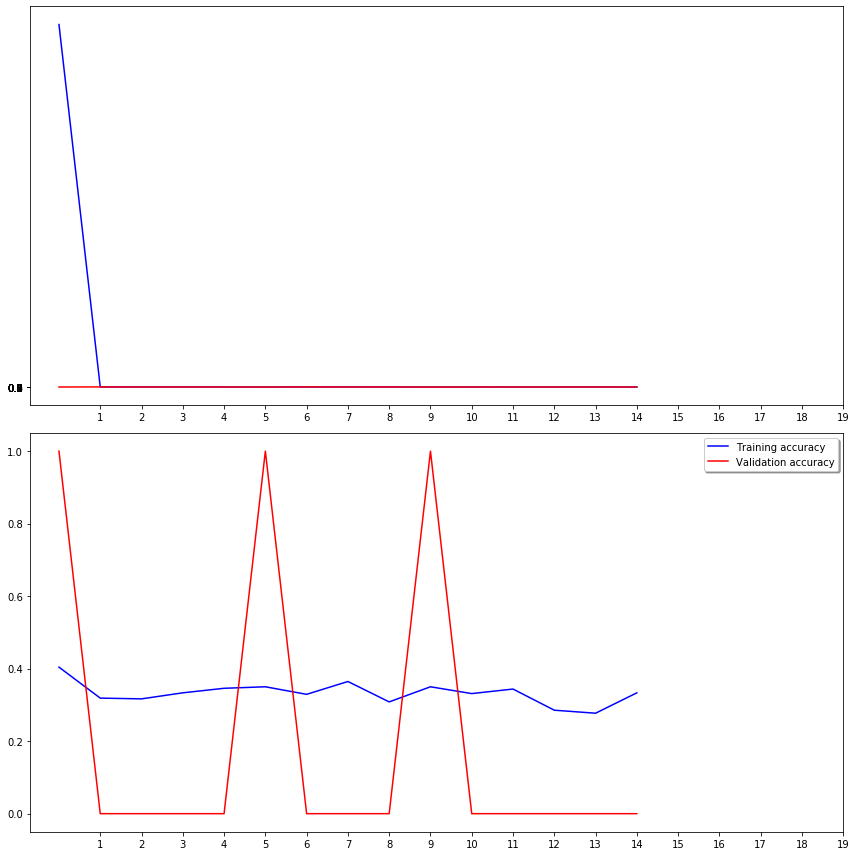

4/4 [==============================] - 0s 73ms/step - loss: 1.1133 - accuracy: 0.3333
Test loss: 1.1133109331130981
Test accuracy: 0.3333333432674408
***********************************************************************************************
Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.0905 - accuracy: 0.4458
Epoch 00001: val_loss improved from inf to 0.88479, saving model to ./nadam1.h5
30/30 [==============================] - 16s 542ms/step - loss: 1.0905 - accuracy: 0.4458 - val_loss: 0.8848 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 0.9645 - accuracy: 0.5063
Epoch 00002: val_loss improved from 0.88479 to 0.66711, saving model to ./nadam1.h5
30/30 [==============================] - 13s 447ms/step - loss: 0.9645 - accuracy: 0.5063 - val_loss: 0.6671 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 0.8179 - accuracy: 0.5896
Epoch 00003: val_l

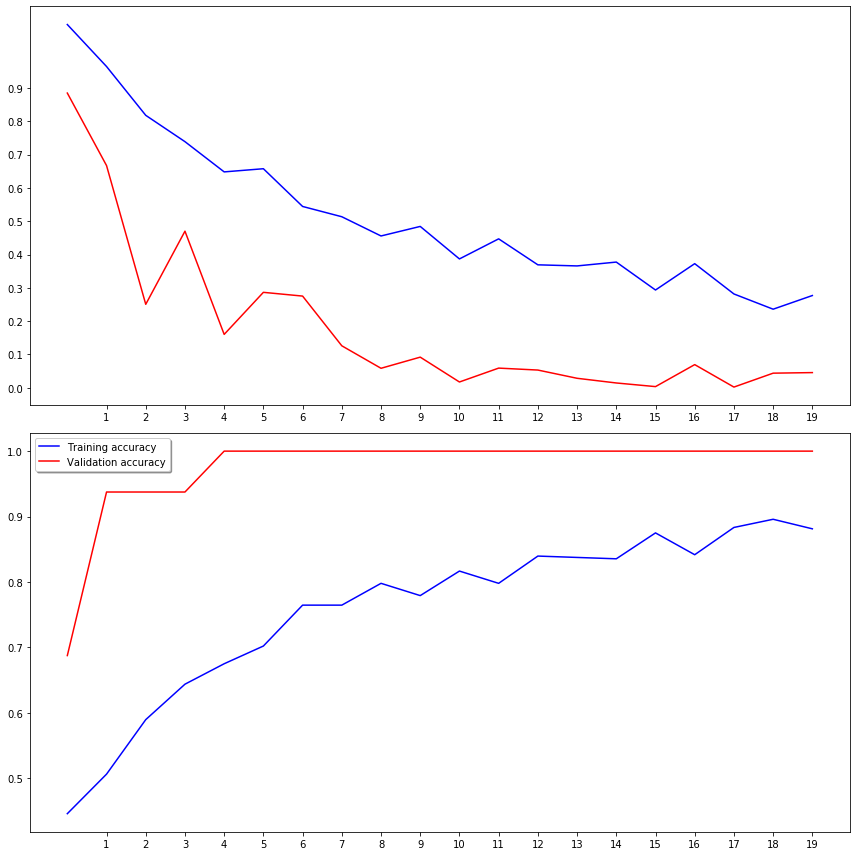

4/4 [==============================] - 0s 95ms/step - loss: 0.3330 - accuracy: 0.8500
Test loss: 0.3329950273036957
Test accuracy: 0.8500000238418579
***********************************************************************************************
Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 2.2989 - accuracy: 0.3229
Epoch 00001: val_loss improved from inf to 1.18933, saving model to ./nadam2.h5
30/30 [==============================] - 16s 550ms/step - loss: 2.2989 - accuracy: 0.3229 - val_loss: 1.1893 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.0990 - accuracy: 0.3271
Epoch 00002: val_loss did not improve from 1.18933
30/30 [==============================] - 13s 422ms/step - loss: 1.0990 - accuracy: 0.3271 - val_loss: 1.2047 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.1006 - accuracy: 0.3438
Epoch 00003: val_loss improved from 1.18933

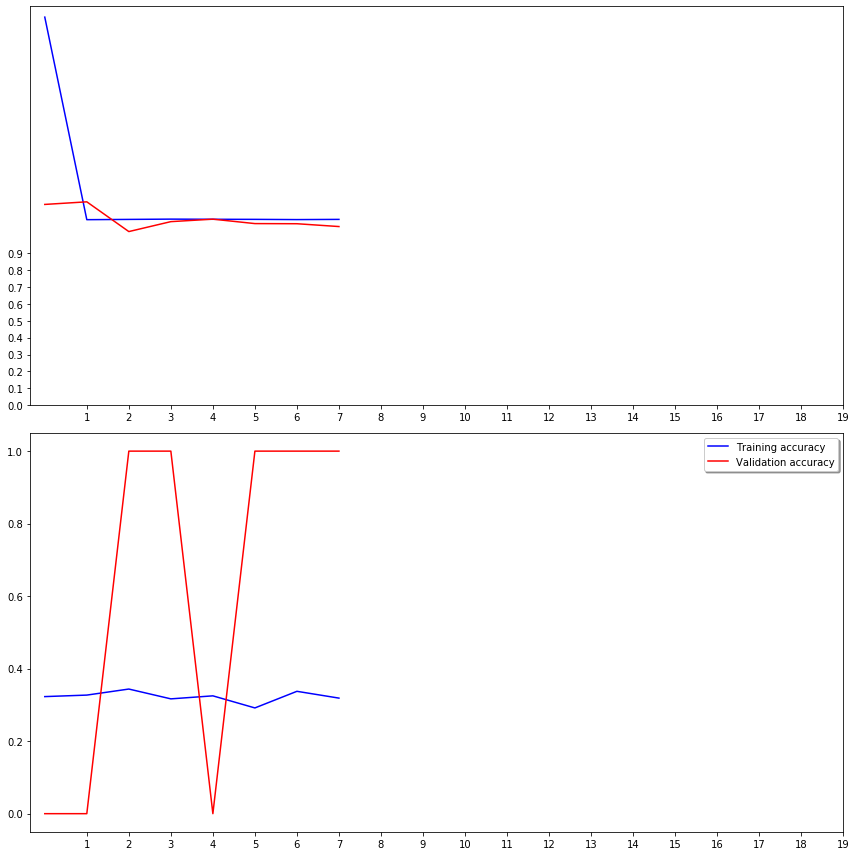

4/4 [==============================] - 0s 73ms/step - loss: 1.1015 - accuracy: 0.3333
Test loss: 1.1014552116394043
Test accuracy: 0.3333333432674408
***********************************************************************************************


In [34]:
evaluate4=[]
for i,a in enumerate(lr):
    model=Sequential()

    # First convolution layer
    model.add(Conv2D(32,(3,3),input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Second convolution layer
    model.add(Conv2D(32,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Third convolution layer
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Fourth convolution layer
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Nadam(
    learning_rate=a, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"),metrics=['accuracy'])

    checkpoint = ModelCheckpoint("./nadam{0}.h5".format(i),
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

    earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

    reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)
        # we put our call backs into a callback list
    callbacks = [earlystop, checkpoint, reduce_lr]

  
        #Traing 
    history = model.fit_generator(
             train_generator, 
             epochs=epoch,
             validation_data=validation_generator,
             validation_steps=nb_validation_samples//batch_size,
             steps_per_epoch=nb_train_samples//batch_size,
             callbacks=callbacks
  
        )
    #Virtualize Training
    import matplotlib.pyplot as plt
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
    ax1.plot(history.history['loss'], color='b', label="Training loss")
    ax1.plot(history.history['val_loss'], color='r', label="validation loss")
    ax1.set_xticks(np.arange(1, epoch, 1))
    ax1.set_yticks(np.arange(0, 1, 0.1))

    ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
    ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
    ax2.set_xticks(np.arange(1, epoch, 1))

    legend = plt.legend(loc='best', shadow=True)
    plt.tight_layout()
    plt.show()

        #lets evaluate our model
    r4=model.evaluate(validation_generator)
    print('Test loss:',r4[0])
    print('Test accuracy:',r4[1])
    evaluate4.append(r4)
    print("***********************************************************************************************")

In [35]:
#lets check accuracy and loss for different learning rate
df=pd.DataFrame({"Loss & Accuracy":evaluate4,"learning rate":lr})
df

,Loss & Accuracy,learning rate
0,"[1.1133109331130981, 0.3333333432674408]",0.100
1,"[0.3329950273036957, 0.8500000238418579]",0.001
2,"[1.1014552116394043, 0.3333333432674408]",0.010


### Model performs well using Nadam optimiser at learning rate(0.001 )

### Load the model and Display the confusion matrix and classification report

In [36]:
#Let's load the model
saved_model_Nadam=load_model("nadam1.h5")
from sklearn.metrics import classification_report, confusion_matrix
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}

#Display the confusion matrix and classification report

Y_pred = saved_model_Nadam.predict(validation_generator, nb_validation_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


Confusion Matrix
[[20  0  0]
 [ 2 13  5]
 [ 0  3 17]]
Classification Report
              precision    recall  f1-score   support

       Saree       0.91      1.00      0.95        20
     Tshirts       0.81      0.65      0.72        20
      shirts       0.77      0.85      0.81        20

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



### Testing our  classifier using Nadam optimiser

In [37]:
pred = saved_model_Nadam.predict(validation_generator)

y_classes = pred.argmax(axis=-1)
print(y_classes)
res = pd.DataFrame()
res['ImageId'] = list(range(1,61))
res['Predicted_Label'] = y_classes
res['Actual_Label']=validation_generator.classes
res["Predicted_Label"] = res["Predicted_Label"].replace({0: 'Saree', 1: 'Shirt',2:'Tshirt'})
res["Actual_Label"] = res["Actual_Label"].replace({0: 'Saree', 1: 'Shirt',2:'Tshirt'})
res.head(40)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 0 1 2 2 1 1 1 2 0
 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 1]


,ImageId,Predicted_Label,Actual_Label
0,1,Saree,Saree
1,2,Saree,Saree
2,3,Saree,Saree
3,4,Saree,Saree
4,5,Saree,Saree
5,6,Saree,Saree
6,7,Saree,Saree
7,8,Saree,Saree
8,9,Saree,Saree
9,10,Saree,Saree


### Let's predict the test images using openCV for Nadam optimiser

In [38]:
from keras.preprocessing import image
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 500 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (150, 150) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (150, 150) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 150, 150


files = []
predictions = []
true_labels = []
# predicting images
for i in range(0, 10):
    path = './ama-clothes/test/'
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = saved_model_Nadam.predict_classes(images, batch_size = 8)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

## Let's compare the optimisers at different learning rates using DataFrame

In [43]:
df_best=pd.DataFrame({'Learning Rate':lr,"Loss & Accuracy of SGD":evaluate,"Loss & Accuracy of NAG":evaluate1,"Loss & Accuracy of rmsprop":evaluate2,"Loss & Accuracy of Adam":evaluate3,"Loss & Accuracy of Nadam":evaluate4})
df_best

,Learning Rate,Loss & Accuracy of SGD,Loss & Accuracy of NAG,Loss & Accuracy of rmsprop,Loss & Accuracy of Adam,Loss & Accuracy of Nadam
0,0.100,"[1.155753493309021, 0.3333333432674408]","[1.1163408756256104, 0.3333333432674408]","[1.151928186416626, 0.3333333432674408]","[1.1100929975509644, 0.3333333432674408]","[1.1133109331130981, 0.3333333432674408]"
1,0.001,"[1.0909289121627808, 0.38333332538604736]","[1.0925108194351196, 0.3333333432674408]","[0.36659830808639526, 0.8166666626930237]","[0.39035168290138245, 0.8500000238418579]","[0.3329950273036957, 0.8500000238418579]"
2,0.010,"[0.5984408855438232, 0.7833333611488342]","[0.8930643796920776, 0.6499999761581421]","[1.0996631383895874, 0.3333333432674408]","[1.1036186218261719, 0.3333333432674408]","[1.1014552116394043, 0.3333333432674408]"


## From above results we can conclude that Nadam optimiser performs the best in comparison to other optimisers. 